# 0. 라이브러리 불러오기

In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기

## 1) train data

In [124]:
train = pd.read_csv('~/aiffel/airlines/train.csv')

train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [125]:
# id 컬럼 제거
train = train.drop('id', axis = 1)

In [126]:
train.shape

(3000, 23)

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [128]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

In [129]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


## 2) test data

In [130]:
test = pd.read_csv('~/aiffel/airlines/test.csv')

test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


In [131]:
test = test.drop('id', axis = 1)

In [132]:
test.shape

(2000, 22)

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2000 non-null   object 
 1   Customer Type                      2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Type of Travel                     2000 non-null   object 
 4   Class                              2000 non-null   object 
 5   Flight Distance                    2000 non-null   int64  
 6   Seat comfort                       2000 non-null   int64  
 7   Departure/Arrival time convenient  2000 non-null   int64  
 8   Food and drink                     2000 non-null   int64  
 9   Gate location                      2000 non-null   int64  
 10  Inflight wifi service              2000 non-null   int64  
 11  Inflight entertainment             2000 non-null   int64

In [134]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [135]:
test.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,39.604500,1989.231500,2.898500,3.046500,2.900000,2.98200,3.218000,3.42550,3.478500,3.450500,3.499000,3.49750,3.701000,3.353000,3.703000,3.33700,12.105000,12.936500
std,15.061723,1046.961959,1.386059,1.509462,1.428993,1.31816,1.288529,1.32262,1.320382,1.289334,1.225459,1.27938,1.140723,1.260232,1.127576,1.30126,30.009636,30.843105
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
25%,27.000000,1379.250000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,3.000000,2.00000,3.000000,3.000000,3.000000,2.00000,0.000000,0.000000
50%,40.000000,1961.500000,3.000000,3.000000,3.000000,3.00000,3.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,3.50000,0.000000,0.000000
75%,51.000000,2564.250000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00000,5.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,4.00000,10.000000,12.000000
max,85.000000,6571.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,448.000000,445.000000


## 3) target 데이터 balance 확인

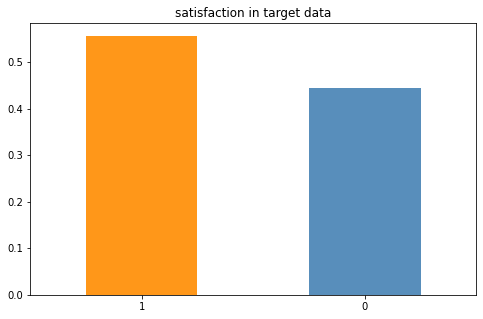

In [136]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 5))
train.target.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('satisfaction in target data')
plt.show()

# 2. feature 분포 시각화

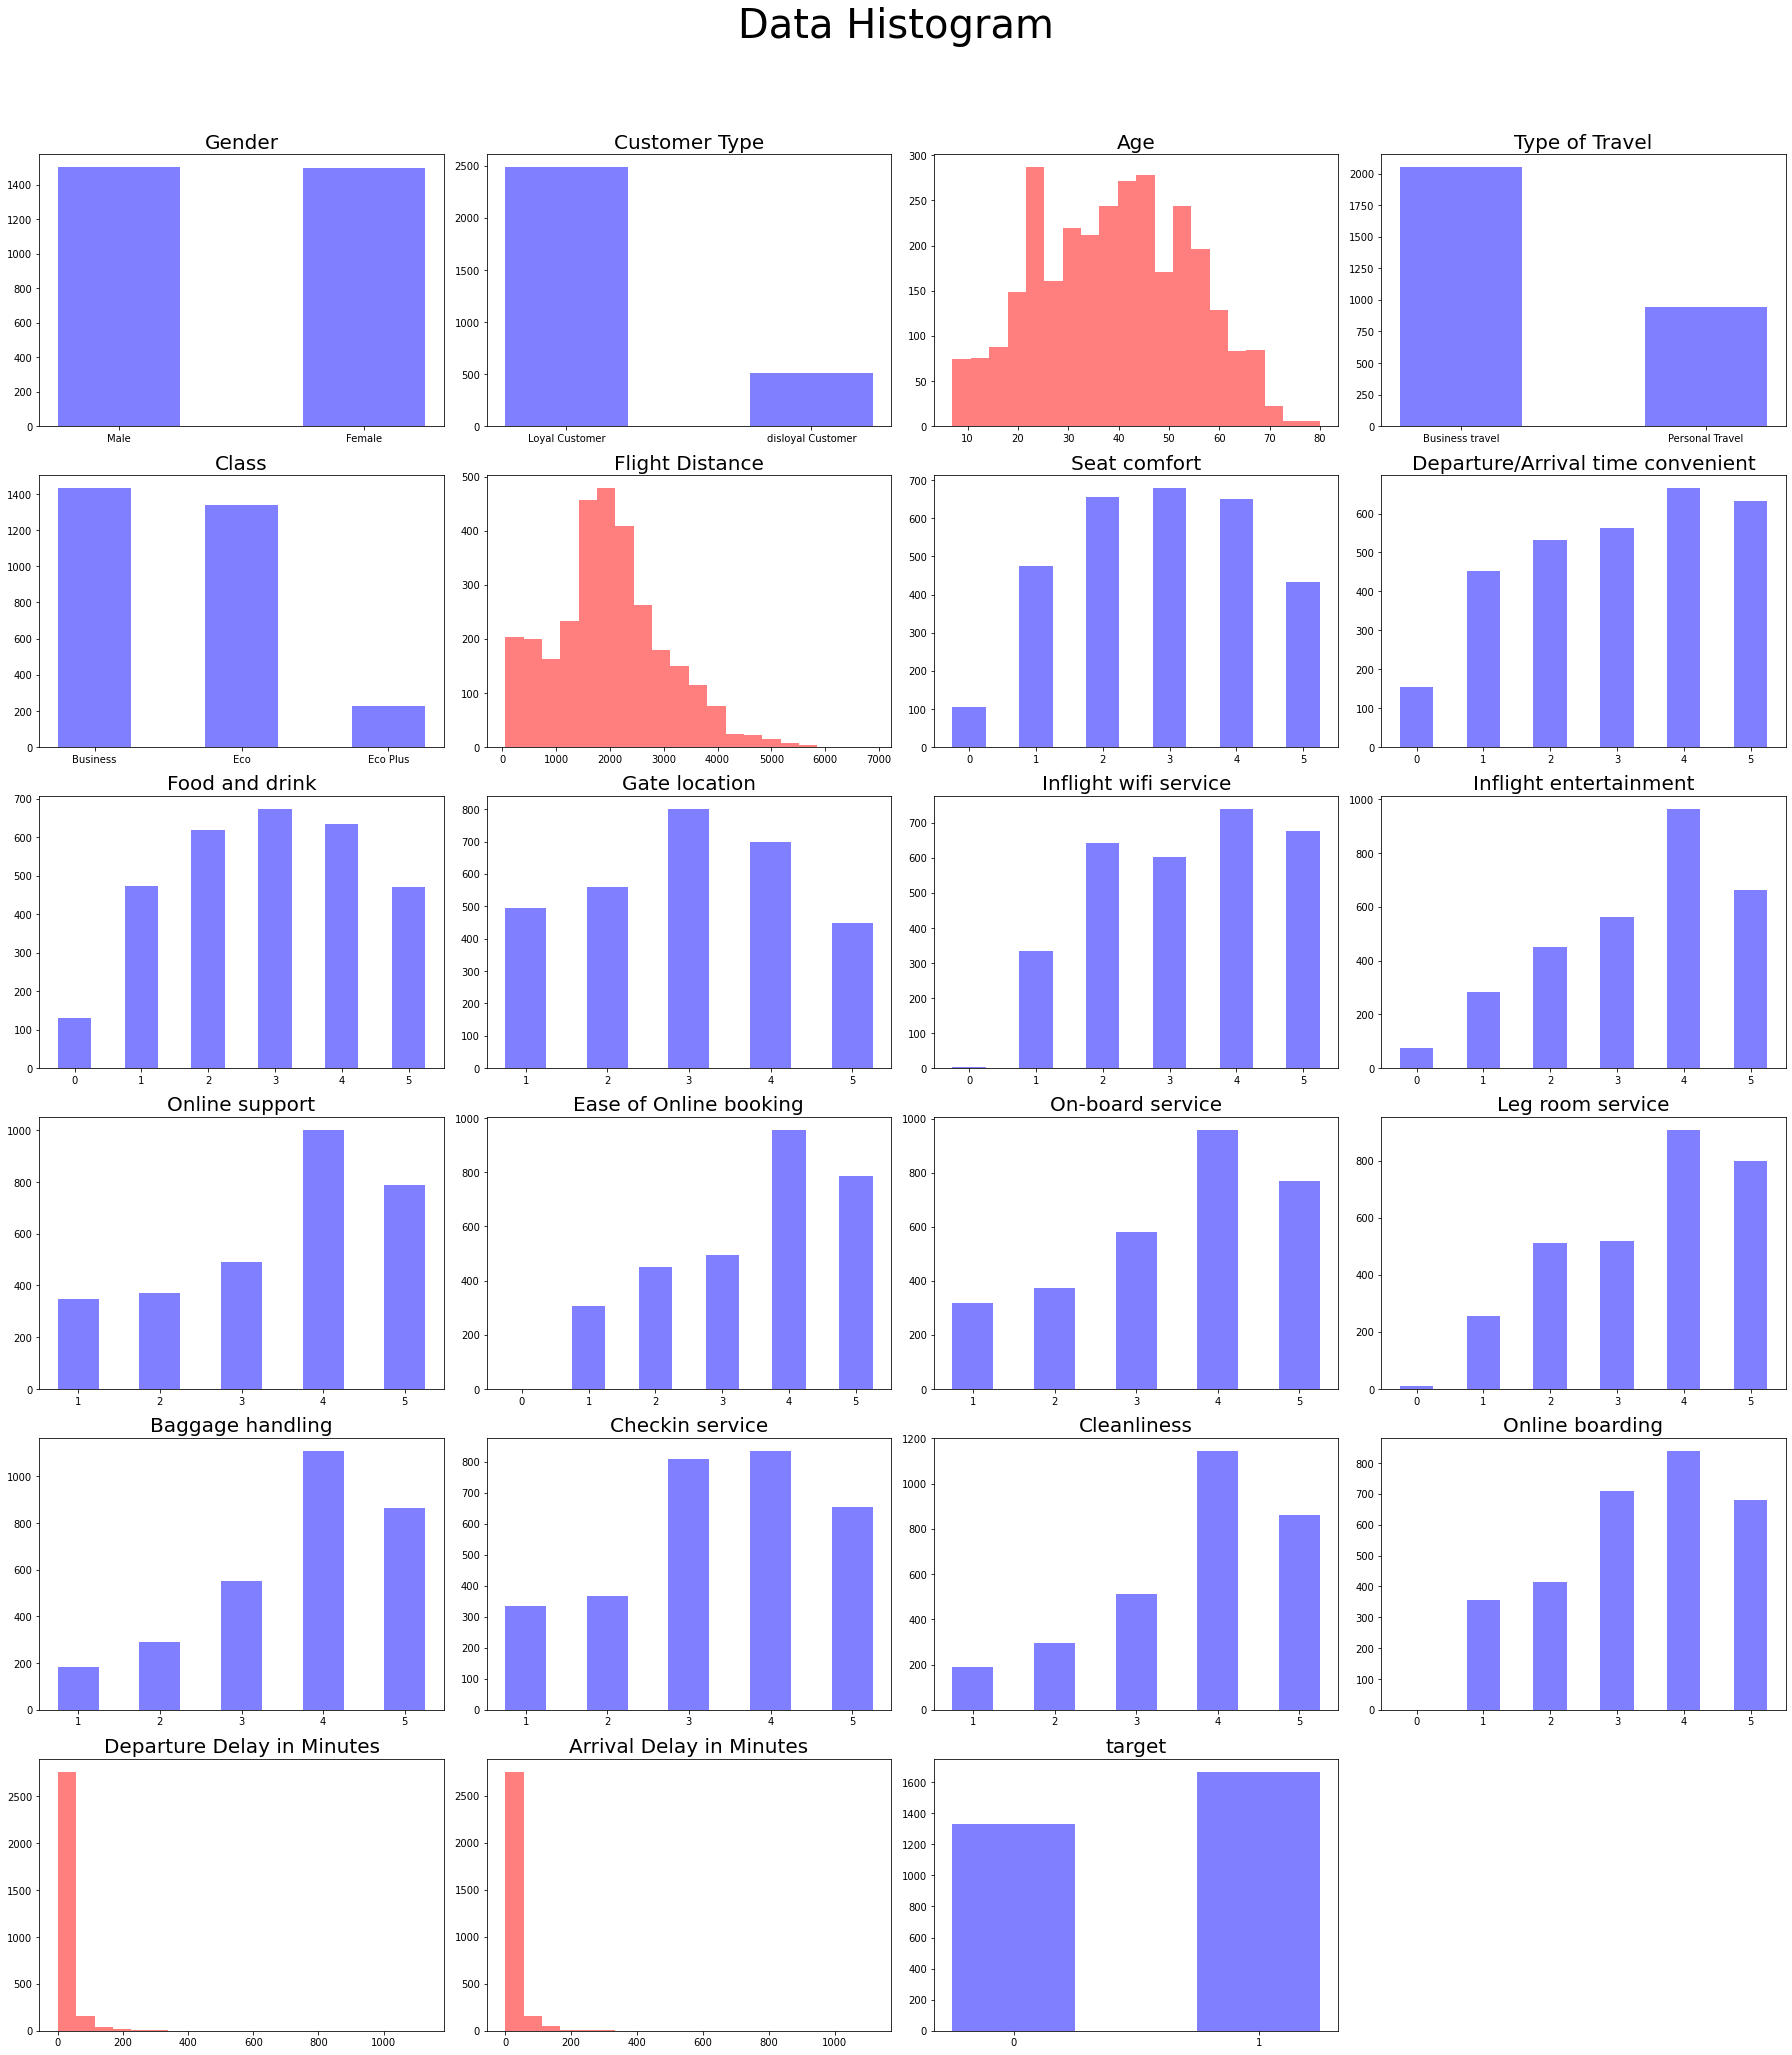

In [137]:
plt.figure(figsize=(25,30))
plt.suptitle("Data Histogram", fontsize=40)

cols = train.columns
for i in range(len(cols)):
    plt.subplot(6,4,i+1) 
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:    # 특징의 고유한 값 종류가 20개 이상이면
        plt.hist(train[cols[i]], bins=20, color='r', alpha = 0.5)   # 빨간색으로 표현한 히스토그램 출력
        
    else:     # 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = train[cols[i]].value_counts()   # 각 특징 별 값 종류의 개수를 temp에 저장
        plt.bar(temp.keys(), temp.values, width=0.5, color = 'b', alpha = 0.5)  # 너비가 0.5이며 파란색으로 표현된 그래프 출력
        plt.xticks(temp.keys())    # x축에 눈금을 표시
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])   # 서브플롯 간의 간격을 유지
plt.show()

1. Gender :  남, 여 성별이 고르게 분포된 것을 확인
2. Customer type : loyal customer >> disloyal customer
3. Age : 연속된 값으로 대략적인 정규분포를 이루고 있음
4. Type of Travel : business travel >> personal travel
5. Class : Business > Eco >> Eco Plus (Eco Plus가 현저히 적음)
6. Flight Distance : 연속된 값이며 좌측으로 치우쳐져있다. (비행 거리가 길진 않음)  
    
    
7. Seat comfort ~ 20. Online boarding 까지는 만족도를 1~5까지 나타냄  
    
    
21. Departure Delay in Minutes : 연속된 값이며 좌측으로 치우쳐져있다. (출발 지연 시간이 길진 않음)
22. Arrival Delay in Minutes : 연속된 값이며 좌측으로 치우쳐져있다. (도착 지연 시간이 길진 않음)

# 3. 라벨 인코딩

In [138]:
Gender_mapping = {'Female' : 1, 'Male' : 2}
train['Gender'] = train['Gender'].map(Gender_mapping)
test['Gender'] = test['Gender'].map(Gender_mapping)

Customer_type_mapping = {'disloyal Customer' : 1, 'Loyal Customer' : 2}
train['Customer Type'] = train['Customer Type'].map(Customer_type_mapping)
test['Customer Type'] = test['Customer Type'].map(Customer_type_mapping)

Type_of_Travel_mapping = {'Business travel' : 1, 'Personal Travel' : 2}
train['Type of Travel'] = train['Type of Travel'].map(Type_of_Travel_mapping)
test['Type of Travel'] = test['Type of Travel'].map(Type_of_Travel_mapping)

Class_mapping = {'Eco' : 1, 'Eco Plus' : 2, 'Business' : 3}
train['Class'] = train['Class'].map(Class_mapping)
test['Class'] = test['Class'].map(Class_mapping)

In [139]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,1,22,1,1,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,1,2,37,1,3,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,2,2,46,1,3,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,1,1,24,1,1,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,1,2,58,1,3,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [140]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,2,61,2,1,2037,1,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,1,1,27,1,3,1846,1,1,1,4,...,1,1,3,4,5,4,4,1,0,0.0
2,1,2,52,1,3,1622,4,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,2,2,54,1,3,3534,4,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,1,2,41,1,1,1471,4,3,3,3,...,4,4,3,1,2,5,4,4,0,0.0


# 4. target과 feature 간 상관계수 확인

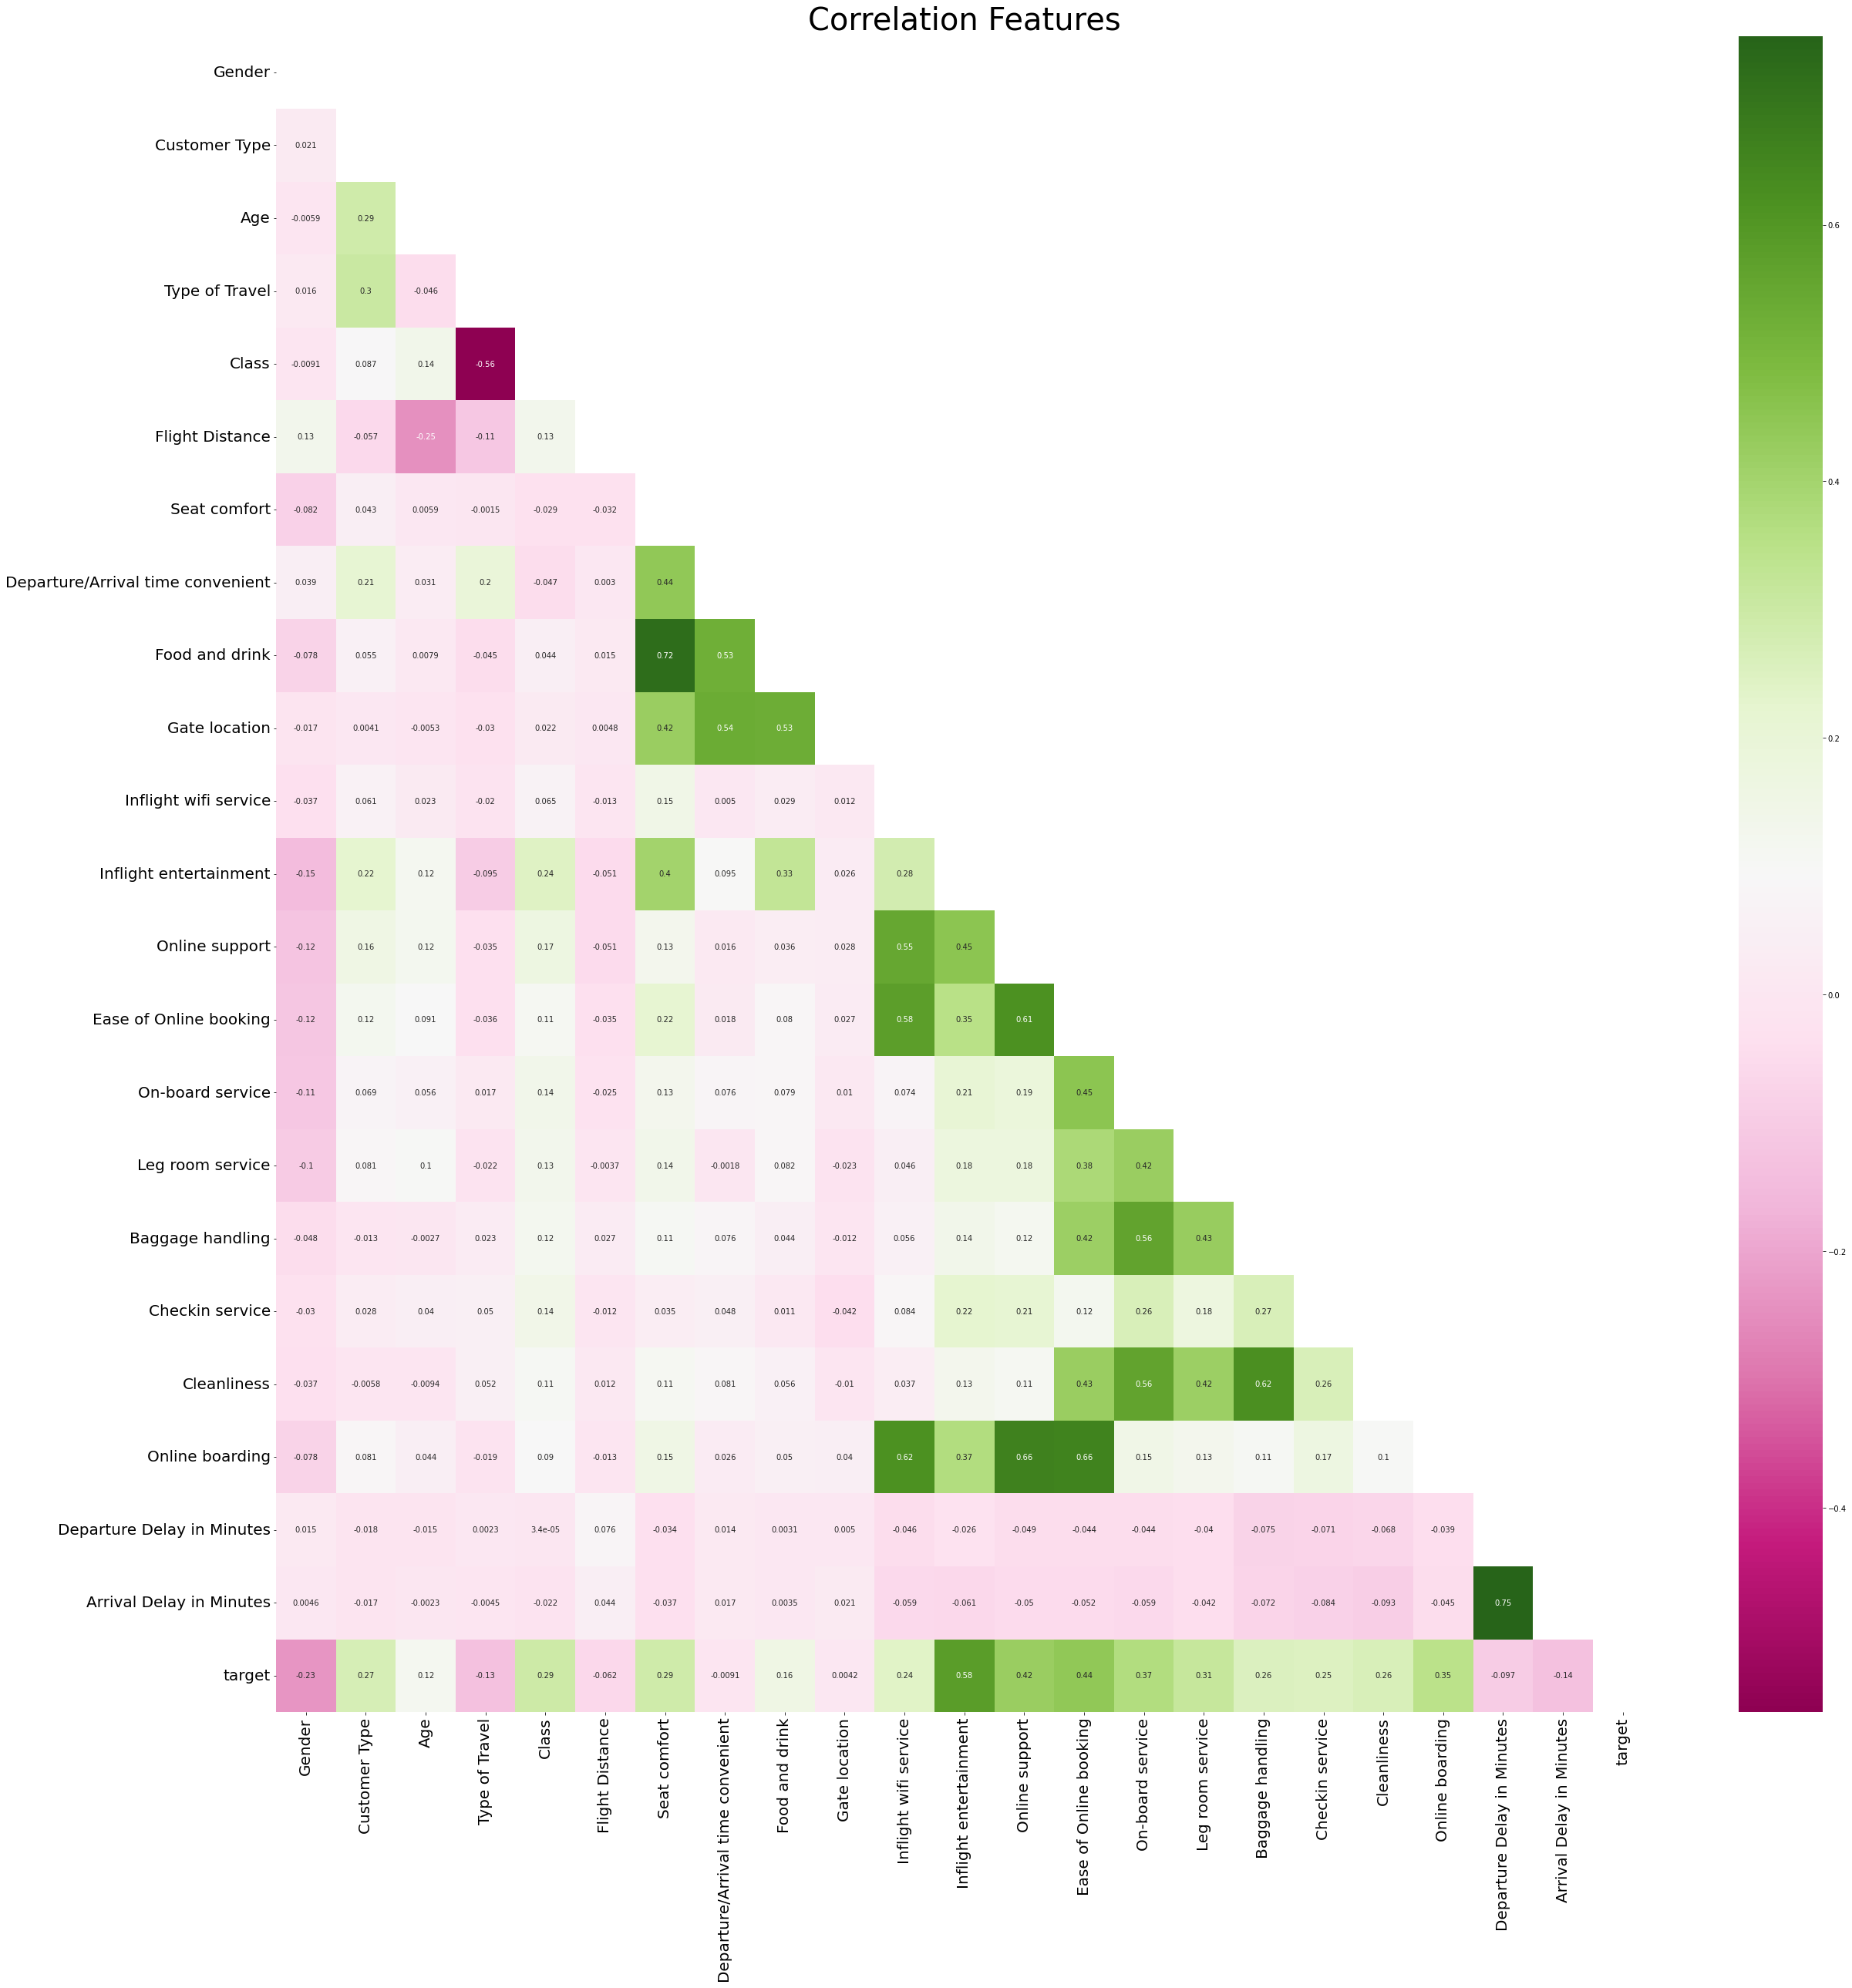

In [141]:
plt.figure(figsize = (40,40))

heat_table = train.corr(method = 'spearman')
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(heat_table, 
            annot=True,    # 실제 값을 표시
            cmap="PiYG",   # 색상
            mask = mask)   # 표시하지 않을 마스크 부분을 지정함

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.title("Correlation Features", fontsize=40)
plt.show()

* target과 상관이 높은 feature : Infight entertainment(0.58), Online support(0.42), Ease of Online booling(0.44), On-board service(0.37), Online boarding(0.35)
* target과 상관이 낮은 feature : Age(0.12), Type of Travel(-0.13),  Departure/Arrival time convenient(-0.0091), Food and drink (0.16), Gate location(0.0042), Departure Delay in Minutes(-0.097), Arrival Delay in Minuetes(-0.14)
* 다중공선성을 나타내는 변수 : Food and Drink - Seat comport (0.72), Departure Delay in Minutes - Arrival Delay in Minuetes (0.75)

# 5. 불필요한 feature 제거

In [142]:
train.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
train.drop('Gate location', axis = 1, inplace = True)
train.drop('Departure Delay in Minutes', axis = 1, inplace = True)
train.drop('Food and drink', axis = 1, inplace = True)
train.drop('Arrival Delay in Minutes', axis = 1, inplace = True)

test.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
test.drop('Gate location', axis = 1, inplace = True)
test.drop('Departure Delay in Minutes', axis = 1, inplace = True)
test.drop('Food and drink', axis = 1, inplace = True)
test.drop('Arrival Delay in Minutes', axis = 1, inplace = True)

In [143]:
train.shape     # 컬럼 수 23개 → 18개로 줄어듦

(3000, 18)

In [144]:
test.shape      # 컬럼 수 22개 → 17개로 줄어듦

(2000, 17)

# 6. 모델 학습

In [145]:
X = train.drop('target', axis = 1)
y = train['target']

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

print('train 데이터 크기 : ', X_train.shape)
print('train 레이블 크기 : ', y_train.shape)
print('-----------------------')
print('test 데이터 크기 : ', X_test.shape)
print('test 레이블 크기 : ', y_test.shape)

train 데이터 크기 :  (2400, 17)
train 레이블 크기 :  (2400,)
-----------------------
test 데이터 크기 :  (600, 17)
test 레이블 크기 :  (600,)


## 1) Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state = 32)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

## 2) Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3) XGBClassifier

In [149]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:26:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## 4) LGBM Classifier

In [150]:
from lightgbm import LGBMClassifier

light = LGBMClassifier()

light.fit(X_train, y_train)
y_pred_light = light.predict(X_test)

accuracy_light = accuracy_score(y_test, y_pred_light)

In [151]:
print('randomforest accuracy : ', accuracy_rf)
print('Logistic Regression accuracy : ', accuracy_lr)
print('XGBClassifier accuracy : ', accuracy_xgb)
print('LGBM Classifier accuracy : ', accuracy_light)

randomforest accuracy :  0.9283333333333333
Logistic Regression accuracy :  0.8
XGBClassifier accuracy :  0.9233333333333333
LGBM Classifier accuracy :  0.925


# 7. 예측

In [152]:
submission = pd.read_csv('~/aiffel/airlines/sample_submission.csv')

submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [153]:
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(test)

submission['target'] = y_pred_rf.astype('int8')
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [154]:
submission.to_csv("randomforest_1.csv", index=False)

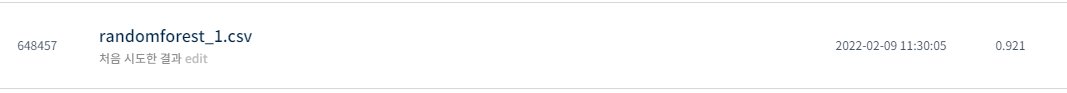  
처음으로 시도하여 위와 같은 결과가 나왔는데, 생각보다 좋은 점수가 나와서 신기했다...  
지금은 너무 정리되지 않은 것들이 많은데 앞으로 스터디원들과 이야기하고 그분들의 코드도 참고해서 잘 다듬어봐야겠다 :)